In [1]:
import json
import random
import numpy as np
import pickle
import time
import plotly.express as px
import pandas as pd
import math
import pyarrow.parquet as pq
import pyarrow as pa
import pandas as pd
from os.path import exists
from statsmodels.stats.inter_rater import fleiss_kappa
from src.bloom_helper import utils

## Small Test

In [253]:
t = utils.get_examples(n=3)
p = utils.make_prompts(t, 1)
o = utils.generate(p, 25)

tmp = np.array(([o[:,1], o[:,2]])).reshape((len(o), 2))
for i in tmp:
    print(utils.evaluate(np.array(i).reshape((1,2))))

[[0.34628382]]
[[0.0639063]]
[[0.10101167]]


## Production Pipeline

In [334]:
n_prompts = 200
n_shots = 2
start_time = time.time()

results = utils.generate(utils.make_prompts(utils.get_examples(n=n_prompts*n_shots), n_shots), 25)
print("Execution Time (mins):", round((time.time() - start_time) / 60, 2))

Execution Time (mins): 29.47


In [335]:
tmp = np.array(([results[:,1], results[:,2]])).reshape((len(results), 2))
evals = utils.evaluate(tmp).reshape((len(tmp), 1))

In [336]:
final = np.hstack((results, evals))

,X,Y-HAT,Y,SIMILARITY
21,"def _loadDummyModelParameters(self, params):\n...",# Loads the notification type for this dummy\n...,# Clean the notify_on_enrollment field.\n,0.42225054
42,def function_selector(method_name_and_signatur...,# Makes the function hash id for a method sign...,# Get the given param from each of the DOFs fo...,0.4117439
190,"def seek(self, relative_position):\n \n...",# Sample the video at `sample_rate`\n# \ndef s...,# Sample from ``top_k`` probabilities.\n# \n# ...,0.41066483
48,"def t_stringdollar_rbrace(self, t):\n r...","# r'/HangupAllCalls\n\ndef hangup_call(self, c...",# REST Hangup All Live Calls Helper\n,0.40248317
30,"def is_categorical_type(ary):\n ""Checks whe...",# Moves an array to a new position.\n#\n# Para...,# Change the priority of a leaf node\n,0.3777315


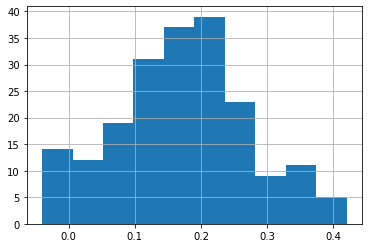

In [337]:
df_final = pd.DataFrame(final.reshape((len(final),4)), columns=['X', 'Y-HAT', 'Y', 'SIMILARITY'])
pd.to_numeric(df_final.SIMILARITY).round(2).hist()
df_final.sort_values(by='SIMILARITY', ascending=False).head()

**Append new results to existing results...**

| filename | n_shots | max_tokens | search |
|----------|---------|------------|--------|
| 2_shots.parquet | 2 | 25 | default_greedy |
| 3_shots.parquet | 3 | 25 | default_greedy |
| 4_shots.parquet | 4 | 25 | default_greedy |

In [338]:
result_set = str(n_shots) + '_shots.parquet'

if exists(result_set):
    pq_tmp = pq.read_table(result_set)
    data = pd.concat([pq_tmp.to_pandas(), df_final])
else:
    data = df_final

pq.write_table(pa.Table.from_pandas(data), result_set)

In [339]:
hq_threshold = 0.4
full_results = pq.read_table(result_set).to_pandas()
full_results.SIMILARITY = pd.to_numeric(full_results.SIMILARITY)
full_results[full_results.SIMILARITY >= hq_threshold]

,X,Y-HAT,Y,SIMILARITY
0,"def output(self, to=None, *args, **kwargs):\n ...",# Outputs a string to a stream\n\n\ndef output...,# Clear description to default values\n,0.441788
2,"def on_resize(self, width, height):\r\n ...",# Pylons specific callback for object list eve...,# object : LEFTBRACE objectlist COMMA RIGHTBRA...,0.485610
21,"def import_funcs(self, module):\n \n ...",# Create an interface from a cells.\n\n\ndef g...,"# The total score for the words found, accordi...",0.406207
24,def url(self):\n \n if self.id i...,# Returns the id of the poll.\n\n\ndef id(self...,# Reverse the audio completely\n,0.466049
40,"def protect_memory_callback(self, start, size,...",# Set memory protection in Unicorn properly\n\...,# Get all facts of this node. Additional argum...,0.473353
48,def B(self):\n \n return unvec(s...,"# Effect-size parameter, B.\n\ndef is_big(self...",# Does this schedule include the provided time...,0.425590
61,"def init(self, f):\n \n def call...",# A decorators used to register an hook functi...,# Returns the indices of cells that belong to ...,0.473999
92,"def create_roles(apps, schema_editor):\n \n...",# This is the key that is pressed when the use...,# GUI callback for key pressed\n,0.401704
10,"def balance(self, unlocked=False):\n \n...",# Returns balance of specified account.\n# \nd...,# Returns a list of values ordered identically...,0.562417
37,def as_call(self):\n \n default ...,eturn the module name of this call.\n\n\ndef m...,# The URL to access this preview.\n,0.409707


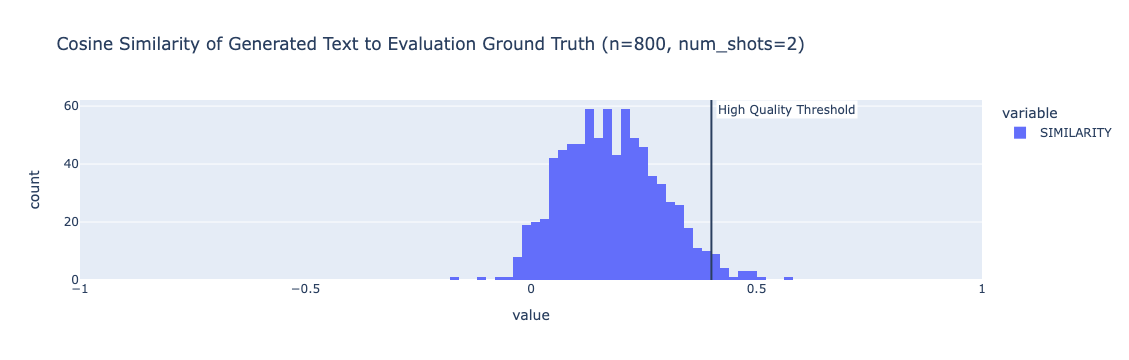

In [340]:
n_preds = len(full_results)
hq_threshold = 0.4

fig = px.histogram(full_results.SIMILARITY, 
                   range_x=[-1,1],
                   title=f'Cosine Similarity of Generated Text to Evaluation Ground Truth (n={n_preds}, num_shots={n_shots})')
fig.add_vline(x=hq_threshold, annotation={'text':'High Quality Threshold', 'bgcolor':'white', 'x':hq_threshold+0.01})

**Comparison of Block-Level Cosine Similarity Across n-Shots**

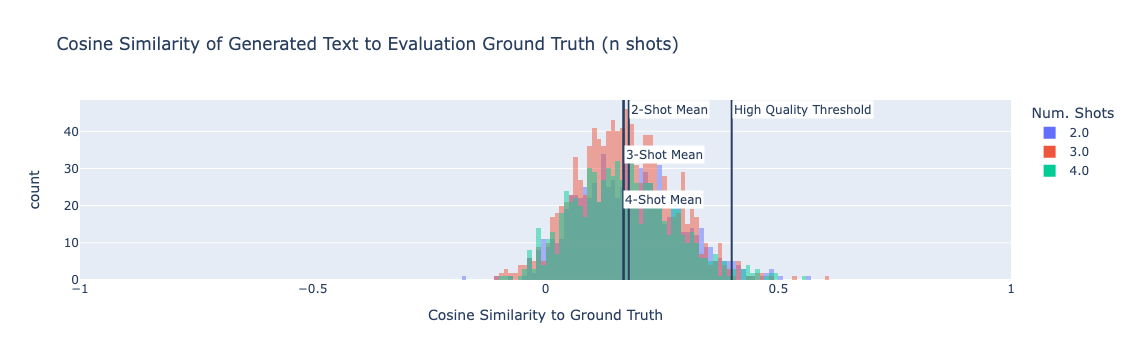

800 1054 770


In [341]:
data_w = pq.read_table('2_shots.parquet').to_pandas().drop(['X', 'Y-HAT', 'Y'], axis=1)
data_w['num_shots'] = [2 for i in range(len(data_w))]

data = pq.read_table('3_shots.parquet').to_pandas().drop(['X', 'Y-HAT', 'Y'], axis=1)
data['num_shots'] = [3 for i in range(len(data))]

data_t = pq.read_table('4_shots.parquet').to_pandas().drop(['X', 'Y-HAT', 'Y'], axis=1)
data_t['num_shots'] = [4 for i in range(len(data_t))]

plot = pd.concat([data_w, data, data_t])
plot = plot.astype(float)

fig = px.histogram(plot,
                   x='SIMILARITY',
                   color='num_shots',
                   range_x=[-1,1],
                   barmode='overlay',
                   title=f'Cosine Similarity of Generated Text to Evaluation Ground Truth (n shots)',
                   labels={'num_shots':'Num. Shots', 'SIMILARITY':'Cosine Similarity to Ground Truth'})
#fig.update_layout(bargap=0.01)
fig.add_vline(x=hq_threshold, annotation={'text':'High Quality Threshold', 'bgcolor':'white', 'x':hq_threshold})

fig.add_vline(x=data_w.SIMILARITY.astype(float).mean(), annotation={'text':'2-Shot Mean', 'bgcolor':'white', 'x':data_w.SIMILARITY.astype(float).mean()})
fig.add_vline(x=data.SIMILARITY.astype(float).mean(), annotation={'text':'3-Shot Mean', 'bgcolor':'white', 'y':0.75, 'x':data.SIMILARITY.astype(float).mean()})
fig.add_vline(x=data_t.SIMILARITY.astype(float).mean(), annotation={'text':'4-Shot Mean', 'bgcolor':'white', 'y':0.5, 'x':data_t.SIMILARITY.astype(float).mean()})

fig.show()
print(len(data_w), len(data), len(data_t))

**Alternative eval metric test...**

In [298]:
## TODO: If geerated text has no lines with [0] == '#', use first line of generated text for eval. 
# Haphazard inspection of generated text seems to indicate that most times a code summary may still be 
# generated on the first line, but it is not consistently preced by a #. Maybe we can force this pattern during generation instead.

one = full_results.sample(1)
print('GROUND TRUTH\n')
print(*one['Y'].values)

print('GENERATED TEXT\n')
print(*one['Y-HAT'].values)

print('\nEVALUATION METRICS\n')
print('BLOCK EMBEDDING COSINE SIMILARITY:', *one['SIMILARITY'].values)

search = []
for i, line in enumerate(one['Y-HAT'].values[0].split('\n')):
    for j, line_y in enumerate(one['Y'].values[0].split('\n')):
        if line.strip() != '' and line_y.strip() != '' and len(line) > 2 and len(line_y)>2 and line[0] == '#':
            e = utils.evaluate(np.array([line.strip(), line_y.strip()]).reshape((1,2)))
            search.append([line.strip(), line_y.strip(), e[0][0]])
           
            
uu = pd.DataFrame(search, columns=['Y-HAT', 'Y', 'SIMILARITY']).sort_values(by=['SIMILARITY'], ascending=False)
print('MEAN PAIRWISE SENTENCE EMBEDDING COSINE SIMILARITY:', uu.SIMILARITY.mean(),'\n')
uu

GROUND TRUTH

# REST Conference Kick helper

GENERATED TEXT

# Creates a conference kick.
# :param call_params: named arguments to the call
# :return: a tuple of (method, path

EVALUATION METRICS

BLOCK EMBEDDING COSINE SIMILARITY: 0.18161693
MEAN PAIRWISE SENTENCE EMBEDDING COSINE SIMILARITY: 0.37104714 



,Y-HAT,Y,SIMILARITY
0,# Creates a conference kick.,# REST Conference Kick helper,0.723749
1,# :param call_params: named arguments to the call,# REST Conference Kick helper,0.213713
2,"# :return: a tuple of (method, path",# REST Conference Kick helper,0.175680


**Human rater test...**

In [173]:
ratings_file = 'Batch_4797888_batch_results.csv' # 'kappa_test.csv'
ratings = pd.read_csv(ratings_file)
ratings = ratings[['Input.text1', 'Input.text2', 'Answer.semantic-similarity.label']]
ratings['Answer.semantic-similarity.label'] = pd.to_numeric(ratings['Answer.semantic-similarity.label'].str[0])

In [174]:
# https://en.wikipedia.org/wiki/Fleiss%27_kappa#Interpretation
# this is ok but we don't really care how well the raters agreed on the specific classes (1-5). Rather, we care whether they agreed that
# the text was more similar than dissimilar. maybe we can binarize the semantic label on val >= 3 and use that as the classes. might be more
# meaningful for predictive use.

tt = []

for i, subject in enumerate(ratings.values):
    z = np.zeros(5)
    z[ratings.values[i][2]-1] += 1
    tt.append(z)
    
prep = np.add.reduceat(tt, range(0, len(tt), 3))
fleiss_kappa(prep)

-0.2804878048780488

In [175]:
r_final = ratings.groupby(by=['Input.text1', 'Input.text2']).mean().reset_index()
r_final

,Input.text1,Input.text2,Answer.semantic-similarity.label
0,# Combine arguments from a function call\r\n\r...,# Combine the default values and the supplied ...,2.666667
1,# Computes a file type value from a file type ...,# file_type_value : OTHER\r\n# | SOURCE\r\n# |...,3.000000
2,# Return a file-like object to which the calli...,# Upload files to the already created (but nev...,3.333333
3,# Returns the state name for the given state.\...,# Returns a textual representation of this Tas...,3.666667
4,# Set the color of a pixel in the image\r\n#\r...,# Set color value of a pixel.\r\n# x: int.\r\n...,4.000000


In [159]:
ratings['is_similar'] = ratings['Answer.semantic-similarity.label'] >= 3

In [160]:
ratings

,Input.text1,Input.text2,Answer.semantic-similarity.label,is_similar
0,# Computes a file type value from a file type ...,# file_type_value : OTHER\r\n# | SOURCE\r\n# |...,2,False
1,# Computes a file type value from a file type ...,# file_type_value : OTHER\r\n# | SOURCE\r\n# |...,4,True
2,# Computes a file type value from a file type ...,# file_type_value : OTHER\r\n# | SOURCE\r\n# |...,3,True
3,# Set the color of a pixel in the image\r\n#\r...,# Set color value of a pixel.\r\n# x: int.\r\n...,5,True
4,# Set the color of a pixel in the image\r\n#\r...,# Set color value of a pixel.\r\n# x: int.\r\n...,4,True
5,# Set the color of a pixel in the image\r\n#\r...,# Set color value of a pixel.\r\n# x: int.\r\n...,3,True
6,# Return a file-like object to which the calli...,# Upload files to the already created (but nev...,1,False
7,# Return a file-like object to which the calli...,# Upload files to the already created (but nev...,4,True
8,# Return a file-like object to which the calli...,# Upload files to the already created (but nev...,5,True
9,# Combine arguments from a function call\r\n\r...,# Combine the default values and the supplied ...,3,True
